03-1
K- 최근접 이웃 회귀

In [2]:
# 데이터 준비
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

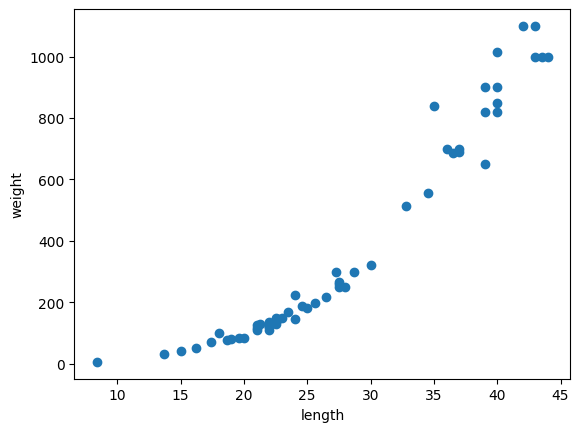

In [3]:
# 산점도 그리기
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
# 훈련세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state =42)

In [5]:
# 2차원 배열 만들기
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [6]:
# (2,2) 크기로 바꾸기
test_array=test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [7]:
# train_input, test_input을 2차원 배열로 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [8]:
# 결정계수 R^2
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [9]:
# 결정계수 출력.
print(knr.score(test_input, test_target))

0.992809406101064


In [10]:
# 타깃과 예측의 절댓값 오차를 평균하여 반환
from sklearn.metrics import mean_absolute_error
# 테스트 세트에 대한 예측 만들기
test_prediction = knr.predict(test_input)
#  테스트 세트에 대한 평균 절댓값 오차 계산
mae= mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


과대 적합 vs 과소 적합
- 훈련세트와 테스트 세트의 점수를 비교했을 때 훈련 세트가 너무 높으면 과대적합,
 그 반대이거나 두 점수가 모두 낮으면 과소적합.

In [11]:
#  훈련세트의 R^2 점수 확인
print(knr.score(train_input, train_target))

0.9698823289099254


In [12]:
# k-최근접 이웃 알고리즘의 이웃의 갯수 k줄이기
knr.n_neighbors =3
# 모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [13]:
#  테스트 세트 점수 확인
print(knr.score(test_input, test_target))

0.9746459963987609


확인 문제 2.
과대 적합과 과소적합에 대한 이해를 돕기 위해 복잡한 모델과 단순한 모델을 만들겠습니다.
앞서 만든 k-최근접 이웃 회귀 모델의 k값을 1,5,10으로 바꿔가며 훈련해 보세요.
그다음 농어의 길이를 5에서 45까지 바꿔가며 예측을 만들어 그래프로 나타내 보세요.

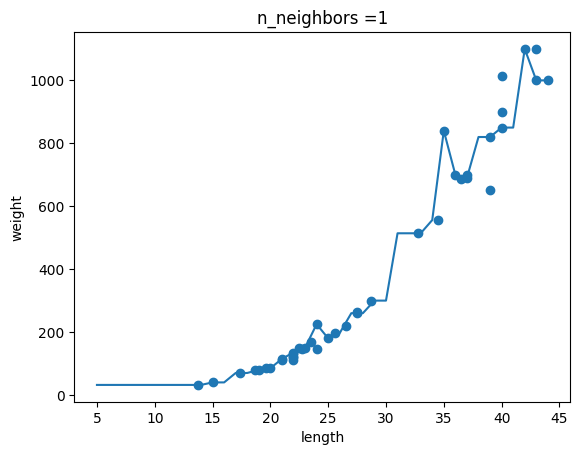

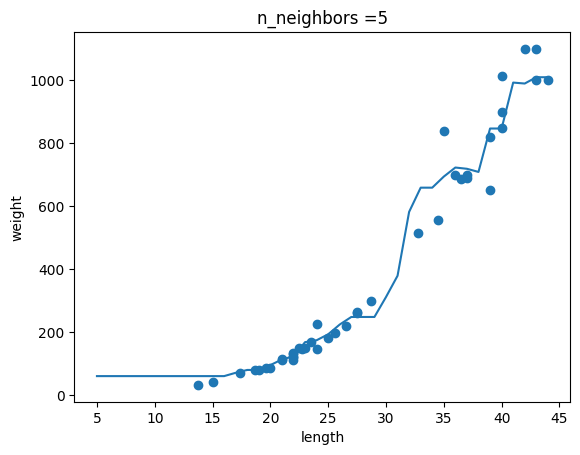

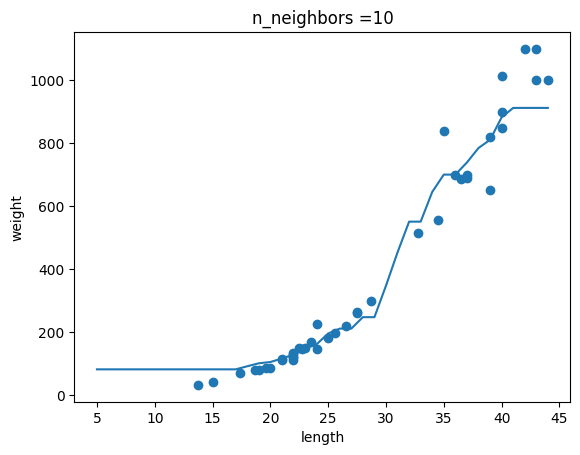

In [14]:
# k-최근접 이웃 회귀 객체 만들기
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
#  5에서 45까지 x 좌표 만들기
x =np.arange(5,45).reshape(-1,1)
# n= 1,5,10 일때 예측 결과를 그래프로 그리기
for n in [1,5,10]:
    #  모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    #  지정한 범위 x에 대한 예측을 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과를 그래프로 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors ={}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()